In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import division
from sklearn import linear_model
import numpy as np
mpl.rc('savefig', dpi=100)
plt.style.use('ggplot')

In [2]:
# Let's load our dataset and take a look at it in a couple of ways.
data = pd.read_csv("student-mat.csv").dropna()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


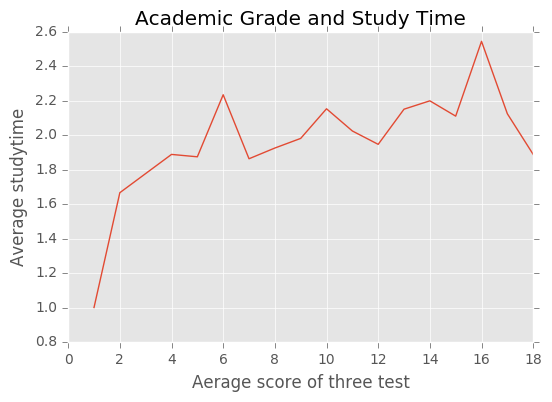

In [4]:
# The relationship between Academic Performance and Study Time
data["Ave_score"]=(data["G1"]+data["G2"]+data["G3"])/3//1
axis_y=np.array([data[data["Ave_score"]==0]["studytime"].mean(),data[data["Ave_score"]==1]["studytime"].mean(),
                data[data["Ave_score"]==2]["studytime"].mean(),data[data["Ave_score"]==3]["studytime"].mean()
               ,data[data["Ave_score"]==4]["studytime"].mean(),data[data["Ave_score"]==5]["studytime"].mean()
                ,data[data["Ave_score"]==6]["studytime"].mean(),data[data["Ave_score"]==7]["studytime"].mean()
                ,data[data["Ave_score"]==8]["studytime"].mean(),data[data["Ave_score"]==9]["studytime"].mean()
                ,data[data["Ave_score"]==10]["studytime"].mean(),data[data["Ave_score"]==11]["studytime"].mean()
                ,data[data["Ave_score"]==12]["studytime"].mean(),data[data["Ave_score"]==13]["studytime"].mean()
                ,data[data["Ave_score"]==14]["studytime"].mean(),data[data["Ave_score"]==15]["studytime"].mean()
                ,data[data["Ave_score"]==16]["studytime"].mean(),data[data["Ave_score"]==17]["studytime"].mean()
                ,data[data["Ave_score"]==18]["studytime"].mean()
                ])
plt.plot(np.arange(0,19),axis_y)
plt.title("Academic Grade and Study Time")
plt.xlabel("Aerage score of three test")
plt.ylabel("Average studytime")

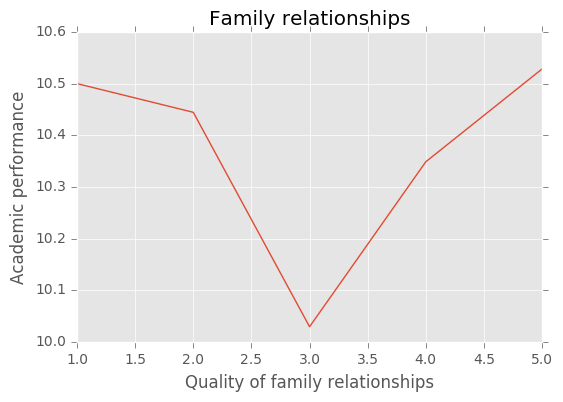

In [5]:
# relationship between quality of family relationships and academic performance
project_bins = pd.cut(data["famrel"], 5)
project_bins.cat.categories
data_grouped_by_pbin = data.groupby(project_bins)
plt.plot(data_grouped_by_pbin["famrel"].mean(),
         data_grouped_by_pbin["Ave_score"].mean()
            )
plt.title("Family relationships")
plt.xlabel("Quality of family relationships")
plt.ylabel("Academic performance")
plt.show()

In [6]:
#Average score of students who take extra classes within the course subject yes or no
[data[data["higher"]=="yes"]["Ave_score"].mean(),data[data["higher"]=="no"]["Ave_score"].mean()]

[10.514666666666667, 7.25]

In [7]:
hist_data=[data[data["paid"]=="yes"]["Ave_score"].mean(),
      data[data["internet"]=="yes"]["Ave_score"].mean(),
     data[data["romantic"]=="yes"]["Ave_score"].mean()
     ]
print(hist_data)

[10.740331491712707, 10.52887537993921, 9.825757575757576]


In [9]:
# Let's check out the RSS of linear regression(linear combination of failures and Medu)

data_gp=data
X_train=np.array([data_gp["failures"].tolist(),data_gp["Medu"].tolist()]).transpose()
y_train=np.array(data_gp["Ave_score"].tolist())
lreg=linear_model.LinearRegression()
lreg.fit(X_train, y_train,sample_weight=None)
lreg.score(X_train, y_train)

0.16198333775715057

Feature ranking:


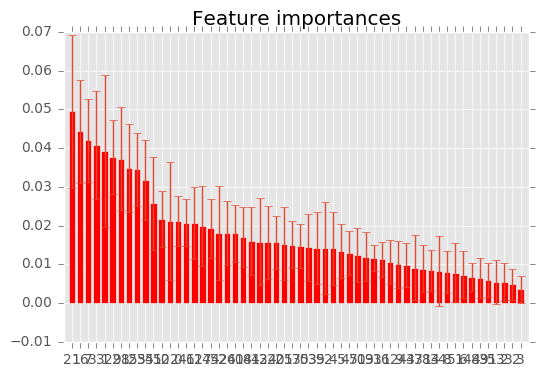

In [12]:
import csv
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from collections import Counter
import numpy as np
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
rawdata=pd.read_csv("student-mat.csv").dropna()
'''
x_train=rawdata.as_matrix().astype('str')
#x_test=mat['test_data']
y_train=x_train[:,32]
#y_train=np.reshape(y_train,(y_train.shape[1],))
#x_train=transformlog(x_train)
#x_test=transformlog(x_test)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=6,max_depth=30)
#clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

y_pred=clf.predict(x_test)
'''
x_rawdata=rawdata.drop('G1', 1)
x_rawdata=x_rawdata.drop('G2', 1)
x_rawdata=x_rawdata.drop('G3', 1)
x_dic=x_rawdata.to_dict(orient='index')
x_list=[x_dic[i]for i in range(len(x_dic))]
vec = DictVectorizer()
x_train=vec.fit_transform(x_list).toarray()
name=vec.get_feature_names()
    #xtest_dic=rawdata_t.to_dict(orient='index')
    #xtest_list=[xtest_dic[i]for i in range(len(xtest_dic))]
    # direct transform using fitted dictvectorizer()
    #x_test=vec.transform(xtest_list).toarray()
y_train=((rawdata['G1']+rawdata['G2']+rawdata['G3'])/3//1).tolist()
clf = RandomForestClassifier(max_features=6,max_depth=20)
#clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(x_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

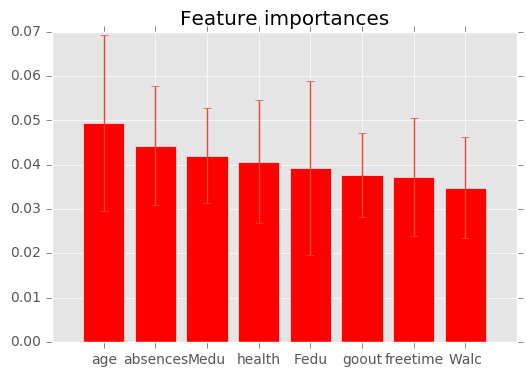

In [13]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(8), importances[indices[:8]],
       color="r", yerr=std[indices[:8]], align="center")
plt.xticks(range(8), [name[i]for i in indices[:8]])
plt.xlim([-1, 8])
plt.show()